### Extracting the number of movement and time in SCIT1 and SCIT2

In [84]:
from update_feature_function import extract_json_file
import pandas as pd 
import numpy as np



#################################################################
### 	input information
#################################################################

video_list = ['DL00006', 'DS00005', 'EJ00004', 'LS00003', 'MSC00011']
time_list = [[16 + 5/6, 21+5/6], [15.5,20.5],[11.6666,16.6666], [11,16], [11,16]]

Dv = []
Dv2 = []
Dm = []


for i in range(len(video_list)):
    video_name = video_list[i]
    SCIT_start = time_list[i][0]
    SCIT_end = time_list[i][1]
    
    Xv, Xv2, Xm = extract_json_file(video_name, SCIT_start, SCIT_end, 20, 20, 100)

    Xv = pd.DataFrame(Xv)
    Xv.columns = ['num_movement_scit1','list_movement_time_s_scit1', 'list_start_time_s_scit1']
#     body_part = ["Nose",  "Neck"]
#                 ,  "RShoulder",  "RElbow",  "RWrist",  "LShoulder",  \
#                 "LElbow",  "LWrist",  "MidHip",  "RHip", "RKnee", "RAnkle", "LHip", "LKnee", \
#                 "LAnkle", "REye", "LEye", "REar", "LEar", "LBigToe", "LSmallToe", "LHeel", \
#                 "RBigToe", "RSmallToe", "RHeel"]
#     Xv.insert(0,'body_part',body_part)
    print(Xv)
    Dv.append(Xv)
    
    Xv2 = pd.DataFrame(Xv2)
    Xv2.columns = ['num_movement_scit1','list_movement_time_s_scit1', 'list_start_time_s_scit1']
#     body_part = ["Nose",  "Neck"]
#                 ,  "RShoulder",  "RElbow",  "RWrist",  "LShoulder",  \
#                 "LElbow",  "LWrist",  "MidHip",  "RHip", "RKnee", "RAnkle", "LHip", "LKnee", \
#                 "LAnkle", "REye", "LEye", "REar", "LEar", "LBigToe", "LSmallToe", "LHeel", \
#                 "RBigToe", "RSmallToe", "RHeel"]
#     Xv.insert(0,'body_part',body_part)
    print(Xv2)
    Dv2.append(Xv2)

    Xm = pd.DataFrame(Xm)
    Xm.columns = ['num_movement_scit1','list_movement_time_s_scit1', 'list_start_time_s_scit1']
#     body_part = ["Nose",  "Neck"]
#                 ,  "RShoulder",  "RElbow",  "RWrist",  "LShoulder",  \
#                 "LElbow",  "LWrist",  "MidHip",  "RHip", "RKnee", "RAnkle", "LHip", "LKnee", \
#                 "LAnkle", "REye", "LEye", "REar", "LEar", "LBigToe", "LSmallToe", "LHeel", \
#                 "RBigToe", "RSmallToe", "RHeel"]
#     Xm.insert(0,'body_part',body_part)
    print(Xm)
    Dm.append(Xm)


starting extract DL00006 JSON files...
DL00006Number of movement based on velocity(threshold_v =  0.0625 ):
8
12
DL00006Number of movement based on velocity(threshold_v =  0.125 ):
12
17
DL00006Number of movement based on velocity(threshold_v =  0.1875 ):
20
22
DL00006Number of movement based on velocity(threshold_v =  0.25 ):
26
26
DL00006Number of movement based on velocity(threshold_v =  0.3125 ):
27
26
DL00006Number of movement based on velocity(threshold_v =  0.375 ):
24
24
DL00006Number of movement based on velocity(threshold_v =  0.4375 ):
20
24
DL00006Number of movement based on velocity(threshold_v =  0.5 ):
20
17
DL00006Number of movement based on velocity(threshold_v =  0.5625 ):
16
6
DL00006Number of movement based on velocity(threshold_v =  0.625 ):
12
5
DL00006Number of movement based on velocity(threshold_v =  0.6875 ):
7
2
DL00006Number of movement based on velocity(threshold_v =  0.75 ):
7
1
DL00006Number of movement based on velocity(threshold_v =  0.8125 ):
3
0
DL000

KeyboardInterrupt: 

In [2]:
Dv = pd.concat(Dv, keys = video_list)
Dv['total_movement_time_s_scit1'] = Dv['list_movement_time_s_scit1'].apply(lambda x: np.sum(x))

Dv2 = pd.concat(Dv2, keys = video_list)
Dv2['total_movement_time_s_scit1'] = Dv2['list_movement_time_s_scit1'].apply(lambda x: np.sum(x))

Dm = pd.concat(Dm, keys = video_list)
Dm['total_movement_time_s_scit1'] = Dm['list_movement_time_s_scit1'].apply(lambda x: np.sum(x))
Dv2

num_movement_scit1  \
DL00006  0                   12   
         1                   14   
         2                   12   
         3                   14   
         4                   12   
         5                   14   
         6                   12   
         7                   14   
         8                   12   
         9                   14   
         10                  25   
         11                  28   
         12                  24   
         13                  26   
         14                  14   
         15                   2   
         16                   4   
         17                   0   
         18                   0   
         19                   0   
         20                   0   
         21                   0   
         22                   0   
         23                   0   
         24                   0   
         25                   0   
         26                   0   
         27                   0   
         28                   0   
         29                   0   
...                         ...   
MSC00011 8                    5   
         9                    6   
         10                  22   
         11                  15   
         12                  27   
         13                  27   
         14                   2   
         15                   1   
         16                   0   
         17                   0   
         18                   0   
         19                   0   
         20                   0   
         21                   0   
         22                   0   
         23                   0   
         24                   0   
         25                   0   
         26                   0   
         27                   0   
         28                   0   
         29                   0   
         30                   0   
         31                   0   
         32                   0   
         33                   0   
         34                   0   
         35                   0   
         36                   0   
         37                   0   

                                    list_movement_time_s_scit1  \
DL00006  0   [115, 46, 534, 30, 272, 655, 268, 357, 59, 240...   
         1   [172, 9, 442, 362, 1695, 152, 82, 1043, 635, 4...   
         2   [115, 46, 534, 30, 272, 655, 268, 356, 59, 240...   
         3   [172, 9, 442, 362, 1695, 152, 82, 1043, 635, 4...   
         4   [115, 46, 534, 30, 272, 655, 268, 356, 59, 240...   
         5   [172, 9, 442, 362, 1695, 152, 82, 1043, 635, 4...   
         6   [115, 46, 534, 30, 272, 655, 268, 356, 59, 240...   
         7   [172, 9, 442, 362, 1695, 152, 82, 1043, 635, 4...   
         8   [115, 46, 534, 30, 272, 655, 268, 356, 59, 240...   
         9   [172, 9, 442, 362, 1695, 152, 82, 1043, 635, 4...   
         10  [115, 21, 4, 304, 3, 3, 18, 139, 397, 84, 68, ...   
         11  [172, 3, 253, 3, 12, 141, 139, 154, 213, 3, 16...   
         12  [18, 2, 94, 2, 95, 15, 22, 4, 2, 108, 79, 2, 8...   
         13  [7, 3, 137, 2, 95, 91, 3, 2, 2, 2, 3, 2, 46, 6...   
         14  [8, 4, 2, 151, 2, 182, 2, 15, 2, 78, 8, 30, 16...   
         15                                             [2, 2]   
         16                                      [2, 3, 3, 79]   
         17                                                 []   
         18                                                 []   
         19                                                 []   
         20                                                 []   
         21                                                 []   
         22                                                 []   
         23                                                 []   
         24                                                 []   
         25                                                 []   
         26                                                 

In [3]:
Dv.to_csv('test_v.csv')
Dv2.to_csv('test_v2.csv')
Dm.to_csv('test_m.csv')

PermissionError: [Errno 13] Permission denied: 'test_m.csv'

In [4]:
import time
# name = ['DL', 'DS', 'EJ', 'LS', 'MSC']

# all_handwriten = []

# for n in name:
#     df_h = pd.read_excel(n + '_clean_data.xlsx', index_col=None, header=None)
#     D_RA = df_h[[1,7,13,19,25,31]]


#     D_curr = []
#     # 6 RA
#     for i in range(6):
        
#         D_h = D_RA[i * 6 +1]
#         D_h = D_h.dropna()
#         D_c = D_h.tolist()
# #         j = 0
# #         # remove duplicate movement
# #         while j < len(D_c): 
# #             for k in range(len(D_c)):
# #                 if j != k:
# #                     if abs(D_c[j] - D_c[k]) < 2:
# #                         del D_c[k]
# #                         j = j - 1;
# #                         break
# #             j = j + 1

#         D_curr.append(D_c)
#     all_handwriten.append(D_curr)

input_part = "arms"

df_DL = pd.read_excel("SCIT10MinData_clean.xlsx", 'DL')
df_DS = pd.read_excel("SCIT10MinData_clean.xlsx", 'DS')
df_EJ = pd.read_excel("SCIT10MinData_clean.xlsx", 'EJ')
df_LS = pd.read_excel("SCIT10MinData_clean.xlsx", 'LS')
df_MSC = pd.read_excel("SCIT10MinData_clean.xlsx", 'MSC')
df_5videos = [df_DL, df_DS, df_EJ, df_LS, df_MSC]
sera_anno_index = ['Unnamed: 3', 'Unnamed: 5']
hebah_anno_index = ['Unnamed: 9', 'Unnamed: 11']
jecika_anno_index = ['Unnamed: 15', 'Unnamed: 17']
natasha_anno_index = ['Unnamed: 21', 'Unnamed: 23']
mackenzie_anno_index = ['Unnamed: 27', 'Unnamed: 29']
safia_anno_index = ['Unnamed: 33', 'Unnamed: 35']
sera_anno = []
hebah_anno = []
jecika_anno = []
natasha_anno = []
machenzie_anno = []
safia_anno = []
for i in range(5):
    curr_df = df_5videos[i]
    sera_anno.append(curr_df[sera_anno_index].dropna().iloc[1:-1])
    hebah_anno.append(curr_df[hebah_anno_index].dropna().iloc[1:-1])
    jecika_anno.append(curr_df[jecika_anno_index].dropna().iloc[1:-1])
    natasha_anno.append(curr_df[natasha_anno_index].dropna().iloc[1:-1])
    machenzie_anno.append(curr_df[mackenzie_anno_index].dropna().iloc[1:-1])
    safia_anno.append(curr_df[safia_anno_index].dropna().iloc[1:-1])
sera_part_anno = []
hebah_part_anno = []
jecika_part_anno = []
natasha_part_anno = []
machenzie_part_anno = []
safia_part_anno = []
for i in range(5):
    sera_part_anno.append(sera_anno[i][sera_anno[i]['Unnamed: 5'].str.contains(input_part)])
    hebah_part_anno.append(hebah_anno[i][hebah_anno[i]['Unnamed: 11'].str.contains(input_part)])
    if i == 1:
        jecika_part_anno.append(jecika_anno[i])
    else:
        jecika_part_anno.append(jecika_anno[i][jecika_anno[i]['Unnamed: 17'].str.contains(input_part)])
    natasha_part_anno.append(natasha_anno[i][natasha_anno[i]['Unnamed: 23'].str.contains(input_part)])
    if i == 1:
        machenzie_part_anno.append(machenzie_anno[i])
    else:
        machenzie_part_anno.append(machenzie_anno[i][machenzie_anno[i]['Unnamed: 29'].str.contains(input_part)])
    safia_part_anno.append(safia_anno[i][safia_anno[i]['Unnamed: 35'].str.contains(input_part)])
output = []
for i in range(5):
    output_curr = []
    output_curr.append(sera_part_anno[i]['Unnamed: 3'].tolist())
    output_curr.append(hebah_part_anno[i]['Unnamed: 9'].tolist())
    output_curr.append(jecika_part_anno[i]['Unnamed: 15'].tolist())
    output_curr.append(natasha_part_anno[i]['Unnamed: 21'].tolist())
    output_curr.append(machenzie_part_anno[i]['Unnamed: 27'].tolist())
    output_curr.append(safia_part_anno[i]['Unnamed: 33'].tolist())
    output.append(output_curr)

all_handwriten = output


# D_c = []
# for i in range(len(D_h)):
#     t1 = D_h.iloc[i]
#     if isinstance(t1, str):
#         t1 = time.strptime(t1.split('.')[0],'%H:%M:%S')
#         t1 = t1.tm_min*60 + t1.tm_sec
#     else:
#         t1 = t1.minute * 60 + t1.second + t1.microsecond / 1000000
    
#     same = 0
    
#     for j in range(i+1,len(D_h)):
#         t2 = D_h.iloc[j]
#         if isinstance(t2, str):
#             t2 = time.strptime(t2.split('.')[0],'%H:%M:%S')
#             t2 = t2.tm_min*60 + t2.tm_sec
#         else:
#             t2 = t2.minute * 60 + t2.second + t2.microsecond / 1000000
        
#         if abs(t2 - t1) < 2:
#             same = 1
#     if same == 1:
#         D_c.append(t1)

# D_c2 = [D_c[0]]
# for i in range(1,len(D_c)):
#     same = 0
#     for j in range(len(D_c2)):
#         if abs(D_c[i] - D_c2[j]) < 2:
#             same = 1
#     if same == 0:
#         D_c2.append(D_c[i])
# len(D_c2)

In [23]:
# total 5 videos:

count_l_RA_miss = []
count_l_RA_pred = []


# 6 RA
for num in range(6):
    count_l_sum = np.zeros(int(len(Dv.loc[video_list[0], :].list_start_time_s_scit1) / 2))
    count_l_pred_sum = np.zeros(int(len(Dv.loc[video_list[0], :].list_start_time_s_scit1) / 2))
    
    
    
    for n_video in range(len(video_list)):
        data = Dv.loc[video_list[n_video], :]
        D_c = all_handwriten[n_video][num]
        count_l = []
        count_l_pred = []
        
        for i in range(int(len(data.list_start_time_s_scit1) / 2)):
            count = 0
            t1_list = data.list_start_time_s_scit1[i*2]
            t1_dur_list = data.list_movement_time_s_scit1[i*2]
            t2_list = data.list_start_time_s_scit1[i*2+1]
            t2_dur_list = data.list_movement_time_s_scit1[i*2+1]
            for k in range(len(D_c)):
                miss = 1
                for j in range(len(t1_list)):
                    t1 = time.strptime(t1_list[j],'%M:%S')
                    t1 = t1.tm_min*60 + t1.tm_sec
                    d1 = t1_dur_list[j]
                    if abs(D_c[k] - t1) < 2 or (t1 < D_c[k] and D_c[k] < t1+d1):
                        miss = 0
                        break
                for j in range(len(t2_list)):
                    t2 = time.strptime(t2_list[j],'%M:%S')
                    t2 = t2.tm_min*60 + t2.tm_sec
                    d2 = t2_dur_list[j]
                    if abs(D_c[k] - t2) < 2 or (t2 < D_c[k] and D_c[k] < t2+d2):
                        miss = 0
                        break
                        
                if miss == 1:
                    count = count + 1
            count_l.append(count)
        
        ## count correct

        for i in range(int(len(data.list_start_time_s_scit1) / 2)):
            count = 0
            t1_list = data.list_start_time_s_scit1[i*2]
            t1_dur_list = data.list_movement_time_s_scit1[i*2]
            for j in range(len(t1_list)):
                for k in range(len(D_c)):
                    t1 = time.strptime(t1_list[j],'%M:%S')
                    t1 = t1.tm_min*60 + t1.tm_sec
                    d1 = t1_dur_list[j]
                    if abs(D_c[k] - t1) < 2 or (t1 < D_c[k] and D_c[k] < t1+d1):
                        count = count + 1
                        break
            t1_list = data.list_start_time_s_scit1[i*2+1]
            t1_dur_list = data.list_movement_time_s_scit1[i*2+1]
            for j in range(len(t1_list)):
                for k in range(len(D_c)):
                    t1 = time.strptime(t1_list[j],'%M:%S')
                    t1 = t1.tm_min*60 + t1.tm_sec
                    d1 = t1_dur_list[j]
                    if abs(D_c[k] - t1) < 2 or (t1 < D_c[k] and D_c[k] < t1+d1):
                        count = count + 1
                        break
            count_l_pred.append(count)
            
        count_l_sum = count_l_sum + count_l
        count_l_pred_sum = count_l_pred_sum + count_l_pred
        
    count_l_RA_miss.append(count_l_sum)
    count_l_RA_pred.append(count_l_pred_sum)
        
            


print(count_l_RA_miss)
print(count_l_RA_pred)

[array([ 95.,  95.,  95.,  96., 110., 122., 128., 132., 145., 152., 156.,
       156., 157., 157., 157., 158., 164., 165., 167.]), array([ 89.,  89.,  89.,  90., 106., 119., 122., 127., 137., 144., 148.,
       148., 151., 151., 153., 155., 161., 163., 168.]), array([ 68.,  68.,  68.,  68.,  81.,  96.,  98., 102., 110., 117., 120.,
       120., 120., 120., 120., 120., 120., 120., 120.]), array([ 68.,  68.,  68.,  68.,  82.,  87.,  89.,  93., 101., 110., 111.,
       111., 113., 113., 113., 115., 118., 120., 123.]), array([ 63.,  63.,  63.,  63.,  78.,  83.,  90.,  92., 105., 114., 118.,
       118., 118., 119., 119., 119., 119., 119., 119.]), array([33., 33., 33., 33., 40., 48., 51., 52., 61., 67., 69., 69., 70.,
       70., 72., 72., 75., 76., 82.])]
[array([60., 79., 87., 85., 67., 51., 31., 19., 14., 10.,  7.,  6.,  5.,
        5.,  4.,  4.,  4.,  3.,  3.]), array([65., 84., 99., 99., 79., 66., 47., 33., 25., 21., 16., 15., 11.,
       10.,  9.,  9., 10.,  7.,  7.]), array([42., 57.

In [24]:
# RA_len = np.zeros(6)
# for i in all_handwriten:
#     for j in range(6):
#         RA_len[j] = RA_len[j] + len(i[j])
# RA_len

In [25]:
recall = []
for i in range(len(count_l_RA_pred)):
    recall.append(np.array(count_l_RA_pred[i]) / (np.array(count_l_RA_pred[i]) + count_l_RA_miss[i]))
recall

[array([0.38709677, 0.45402299, 0.47802198, 0.46961326, 0.37853107,
        0.29479769, 0.19496855, 0.12582781, 0.08805031, 0.0617284 ,
        0.04294479, 0.03703704, 0.0308642 , 0.0308642 , 0.02484472,
        0.02469136, 0.02380952, 0.01785714, 0.01764706]),
 array([0.42207792, 0.48554913, 0.52659574, 0.52380952, 0.42702703,
        0.35675676, 0.27810651, 0.20625   , 0.15432099, 0.12727273,
        0.09756098, 0.09202454, 0.06790123, 0.0621118 , 0.05555556,
        0.05487805, 0.05847953, 0.04117647, 0.04      ]),
 array([0.38181818, 0.456     , 0.4962963 , 0.46031746, 0.37209302,
        0.27272727, 0.16949153, 0.08928571, 0.05982906, 0.04098361,
        0.01639344, 0.01639344, 0.00826446, 0.00826446, 0.00826446,
        0.00826446, 0.00826446, 0.00826446, 0.00826446]),
 array([0.47286822, 0.54362416, 0.57232704, 0.57232704, 0.47096774,
        0.40816327, 0.2992126 , 0.225     , 0.17886179, 0.13385827,
        0.10483871, 0.09756098, 0.08130081, 0.07377049, 0.07377049,
        0.

In [26]:
np.array(recall).sum(axis=0) / 6

array([0.45400204, 0.52334077, 0.55720821, 0.54470913, 0.45164728,
       0.37756867, 0.27570444, 0.20089145, 0.1495933 , 0.11507989,
       0.08432887, 0.0795979 , 0.05948668, 0.05410019, 0.04968942,
       0.04935263, 0.05181929, 0.03855728, 0.03716659])

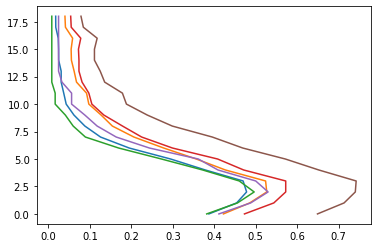

In [27]:
import matplotlib.pyplot as plt
plt.plot(np.array(recall).T, np.arange(0,19))

In [80]:
move_len = np.zeros(19)
for i in video_list:
    move_len = move_len + Dv.loc[i,:][0::2].num_movement_scit1.tolist() #+ Dv.loc[i,:][1::2].num_movement_scit1.tolist()
move_len

array([ 43.,  62.,  83., 111., 120., 112.,  98.,  86.,  60.,  46.,  34.,
        28.,  15.,  13.,  11.,   9.,   8.,   6.,   5.])

In [81]:
preci = []
for i in range(len(count_l_RA_pred)):
    preci.append(count_l_RA_pred[i] / move_len)

In [82]:
np.array(preci).sum(axis=0) / 6

array([0.57364341, 0.15860215, 0.08433735, 0.05705706, 0.03333333,
       0.03125   , 0.03061224, 0.03488372, 0.05      , 0.07246377,
       0.09803922, 0.05357143, 0.1       , 0.06410256, 0.07575758,
       0.09259259, 0.10416667, 0.11111111, 0.13333333])

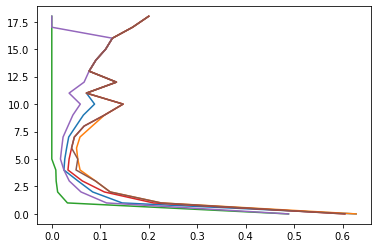

In [83]:
plt.plot(np.array(preci).T, np.arange(0,19))

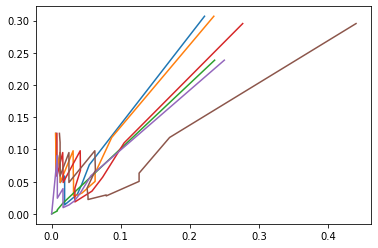

In [79]:
plt.plot(np.array(recall).T, np.array(preci).T)

In [33]:
# AUC calculation:
area = 0
for i in range(len(recall)):
    area = area + np.trapz(np.flip(preci[i]), np.flip(recall[i]))
area / 6

0.12159447530334848

In [34]:
# total 5 videos:

count_l_RA_miss = []
count_l_RA_pred = []


# 6 RA
for num in range(6):
    count_l_sum = np.zeros(int(len(Dv2.loc[video_list[0], :].list_start_time_s_scit1) / 2))
    count_l_pred_sum = np.zeros(int(len(Dv2.loc[video_list[0], :].list_start_time_s_scit1) / 2))
    
    
    
    for n_video in range(len(video_list)):
        data = Dv2.loc[video_list[n_video], :]
        D_c = all_handwriten[n_video][num]
        count_l = []
        count_l_pred = []
        
        for i in range(int(len(data.list_start_time_s_scit1) / 2)):
            count = 0
            t1_list = data.list_start_time_s_scit1[i*2]
            t1_dur_list = data.list_movement_time_s_scit1[i*2]
            for k in range(len(D_c)):
                miss = 1
                for j in range(len(t1_list)):
                    t1 = time.strptime(t1_list[j],'%M:%S')
                    t1 = t1.tm_min*60 + t1.tm_sec
                    d1 = t1_dur_list[j]
                    if abs(D_c[k] - t1) < 2 or (t1 < D_c[k] and D_c[k] < t1+d1):
                        miss = 0
                        break
                if miss == 1:
                    count = count + 1
            count_l.append(count)
        
        for i in range(int(len(data.list_start_time_s_scit1) / 2)):
            count = 0
            t1_list = data.list_start_time_s_scit1[i*2]
            t1_dur_list = data.list_movement_time_s_scit1[i*2]
            for j in range(len(t1_list)):
                for k in range(len(D_c)):
                    t1 = time.strptime(t1_list[j],'%M:%S')
                    t1 = t1.tm_min*60 + t1.tm_sec
                    d1 = t1_dur_list[j]
                    if abs(D_c[k] - t1) < 2 or (t1 < D_c[k] and D_c[k] < t1+d1):
                        count = count + 1
                        break
            count_l_pred.append(count)
            
        count_l_sum = count_l_sum + count_l
        count_l_pred_sum = count_l_pred_sum + count_l_pred
        
    count_l_RA_miss.append(count_l_sum)
    count_l_RA_pred.append(count_l_pred_sum)
        
            


print(count_l_RA_miss)
print(count_l_RA_pred)

[array([ 95.,  95.,  95.,  95.,  95., 100., 133., 147., 155., 156., 156.,
       161., 162., 165., 170., 170., 171., 171., 171.]), array([ 89.,  89.,  89.,  89.,  89.,  92., 128., 143., 147., 150., 150.,
       154., 156., 162., 173., 173., 175., 175., 177.]), array([ 68.,  68.,  68.,  68.,  68.,  72., 102., 119., 120., 122., 122.,
       122., 122., 122., 122., 122., 122., 122., 122.]), array([ 68.,  68.,  68.,  68.,  68.,  70.,  95., 110., 112., 113., 113.,
       116., 116., 120., 124., 124., 126., 126., 128.]), array([ 63.,  63.,  63.,  63.,  63.,  64.,  95., 110., 117., 119., 119.,
       120., 121., 121., 121., 121., 121., 121., 121.]), array([33., 33., 33., 33., 33., 36., 56., 68., 69., 70., 70., 73., 74.,
       76., 84., 84., 85., 85., 86.])]
[array([38., 38., 38., 38., 38., 52., 24.,  9.,  5.,  3.,  3.,  4.,  4.,
        4.,  3.,  3.,  2.,  2.,  2.]), array([39., 39., 39., 39., 39., 58., 32., 15.,  9.,  7.,  7.,  8.,  8.,
        8.,  7.,  7.,  6.,  6.,  5.]), array([31., 31.

In [35]:
recall = []
for i in range(len(count_l_RA_pred)):
    recall.append(np.array(count_l_RA_pred[i]) / (np.array(count_l_RA_pred[i]) + count_l_RA_miss[i]))
recall

[array([0.28571429, 0.28571429, 0.28571429, 0.28571429, 0.28571429,
        0.34210526, 0.15286624, 0.05769231, 0.03125   , 0.01886792,
        0.01886792, 0.02424242, 0.02409639, 0.02366864, 0.01734104,
        0.01734104, 0.01156069, 0.01156069, 0.01156069]),
 array([0.3046875 , 0.3046875 , 0.3046875 , 0.3046875 , 0.3046875 ,
        0.38666667, 0.2       , 0.09493671, 0.05769231, 0.04458599,
        0.04458599, 0.04938272, 0.04878049, 0.04705882, 0.03888889,
        0.03888889, 0.03314917, 0.03314917, 0.02747253]),
 array([0.31313131, 0.31313131, 0.31313131, 0.31313131, 0.31313131,
        0.34545455, 0.10526316, 0.01652893, 0.00826446, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]),
 array([0.35849057, 0.35849057, 0.35849057, 0.35849057, 0.35849057,
        0.44444444, 0.22764228, 0.09836066, 0.05882353, 0.05042017,
        0.04237288, 0.04918033, 0.04918033, 0.04761905, 0.04615385,
        0.

In [36]:
np.array(recall).sum(axis=0) / 6

array([0.35450369, 0.35450369, 0.35450369, 0.35450369, 0.35450369,
       0.41866366, 0.19518205, 0.08301323, 0.04940249, 0.03688535,
       0.03554413, 0.03966072, 0.03796915, 0.03696355, 0.0312506 ,
       0.0312506 , 0.0261681 , 0.0261681 , 0.02207967])

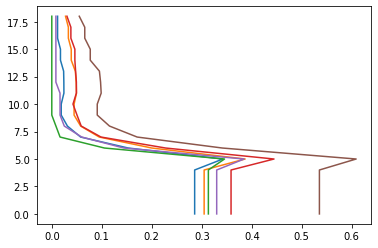

In [37]:
plt.plot(np.array(recall).T, np.arange(0,19))

In [38]:
move_len = np.zeros(19)
for i in video_list:
    move_len = move_len + Dv2.loc[i,:][0::2].num_movement_scit1
move_len

0      55.0
2      55.0
4      55.0
6      55.0
8      55.0
10    106.0
12    115.0
14     39.0
16     20.0
18     10.0
20      8.0
22      9.0
24      8.0
26      8.0
28      8.0
30      8.0
32      7.0
34      7.0
36      6.0
Name: num_movement_scit1, dtype: float64

In [39]:
preci = []
for i in range(len(count_l_RA_pred)):
    preci.append(count_l_RA_pred[i] / move_len)

In [40]:
np.array(preci).sum(axis=0) / 6

array([0.65151515, 0.65151515, 0.65151515, 0.65151515, 0.65151515,
       0.47169811, 0.20434783, 0.25213675, 0.28333333, 0.41666667,
       0.5       , 0.51851852, 0.5625    , 0.5625    , 0.5       ,
       0.5       , 0.47619048, 0.47619048, 0.47222222])

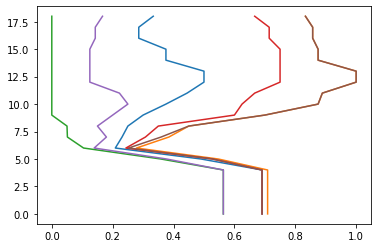

In [41]:
plt.plot(np.array(preci).T, np.arange(0,19))

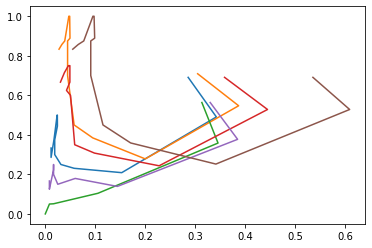

In [42]:
plt.plot(np.array(recall).T, np.array(preci).T)

In [43]:
# AUC calculation:
area = 0
for i in range(len(recall)):
    area = area + np.trapz(np.flip(preci[i]), np.flip(recall[i]))
area / 6

0.09174320388925522

In [44]:
# total 5 videos:

count_l_RA_miss = []
count_l_RA_pred = []


# 6 RA
for num in range(6):
    count_l_sum = np.zeros(int(len(Dm.loc[video_list[0], :].list_start_time_s_scit1) / 2))
    count_l_pred_sum = np.zeros(int(len(Dm.loc[video_list[0], :].list_start_time_s_scit1) / 2))
    
    
    
    for n_video in range(len(video_list)):
        data = Dm.loc[video_list[n_video], :]
        D_c = all_handwriten[n_video][num]
        count_l = []
        count_l_pred = []
        
        for i in range(int(len(data.list_start_time_s_scit1) / 2)):
            count = 0
            t1_list = data.list_start_time_s_scit1[i*2]
            t1_dur_list = data.list_movement_time_s_scit1[i*2]
            for k in range(len(D_c)):
                miss = 1
                for j in range(len(t1_list)):
                    t1 = time.strptime(t1_list[j],'%M:%S')
                    t1 = t1.tm_min*60 + t1.tm_sec
                    d1 = t1_dur_list[j]
                    if abs(D_c[k] - t1) < 2 or (t1 < D_c[k] and D_c[k] < t1+d1):
                        miss = 0
                        break
                if miss == 1:
                    count = count + 1
            count_l.append(count)

        for i in range(int(len(data.list_start_time_s_scit1) / 2)):
            count = 0
            t1_list = data.list_start_time_s_scit1[i*2]
            t1_dur_list = data.list_movement_time_s_scit1[i*2]
            for j in range(len(t1_list)):
                for k in range(len(D_c)):
                    t1 = time.strptime(t1_list[j],'%M:%S')
                    t1 = t1.tm_min*60 + t1.tm_sec
                    d1 = t1_dur_list[j]
                    if abs(D_c[k] - t1) < 2 or (t1 < D_c[k] and D_c[k] < t1+d1):
                        count = count + 1
                        break
            count_l_pred.append(count)
            
        count_l_sum = count_l_sum + count_l
        count_l_pred_sum = count_l_pred_sum + count_l_pred
        
    count_l_RA_miss.append(count_l_sum)
    count_l_RA_pred.append(count_l_pred_sum)
        
            


print(count_l_RA_miss)
print(count_l_RA_pred)

[array([ 95., 156., 156., 156., 157., 157., 157., 157., 157., 157., 157.,
       158., 162., 164., 164., 164., 164., 164., 168.]), array([ 88., 147., 149., 149., 152., 152., 153., 153., 153., 155., 156.,
       160., 161., 168., 168., 168., 168., 168., 177.]), array([ 68., 119., 121., 121., 121., 122., 122., 122., 122., 122., 122.,
       122., 122., 122., 122., 122., 122., 122., 122.]), array([ 68., 111., 113., 113., 115., 115., 115., 115., 115., 115., 116.,
       118., 123., 129., 129., 129., 129., 129., 131.]), array([ 63., 116., 117., 117., 117., 119., 119., 119., 120., 120., 120.,
       121., 121., 121., 121., 121., 121., 122., 122.]), array([33., 68., 69., 69., 70., 70., 72., 72., 74., 74., 75., 78., 78.,
       81., 81., 81., 81., 81., 88.])]
[array([27.,  9.,  7.,  6.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  2.,  2.,
        1.,  1.,  1.,  1.,  1.,  1.]), array([27., 14., 10., 10.,  7.,  6.,  5.,  5.,  5.,  5.,  5.,  2.,  2.,
        1.,  1.,  1.,  1.,  1.,  1.]), array([21.,  2.

In [45]:
recall = []
for i in range(len(count_l_RA_pred)):
    recall.append(np.array(count_l_RA_pred[i]) / (np.array(count_l_RA_pred[i]) + count_l_RA_miss[i]))
recall

[array([0.22131148, 0.05454545, 0.04294479, 0.03703704, 0.01875   ,
        0.01875   , 0.01875   , 0.01875   , 0.01875   , 0.01875   ,
        0.01875   , 0.0125    , 0.01219512, 0.00606061, 0.00606061,
        0.00606061, 0.00606061, 0.00606061, 0.00591716]),
 array([0.23478261, 0.08695652, 0.06289308, 0.06289308, 0.04402516,
        0.03797468, 0.03164557, 0.03164557, 0.03164557, 0.03125   ,
        0.0310559 , 0.01234568, 0.01226994, 0.00591716, 0.00591716,
        0.00591716, 0.00591716, 0.00591716, 0.00561798]),
 array([0.23595506, 0.01652893, 0.00819672, 0.00819672, 0.00819672,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]),
 array([0.27659574, 0.10483871, 0.07377049, 0.05833333, 0.03361345,
        0.03361345, 0.03361345, 0.03361345, 0.03361345, 0.04166667,
        0.04132231, 0.01666667, 0.016     , 0.00769231, 0.00769231,
        0.

In [46]:
np.array(preci).sum(axis=0) / 6

array([0.65151515, 0.65151515, 0.65151515, 0.65151515, 0.65151515,
       0.47169811, 0.20434783, 0.25213675, 0.28333333, 0.41666667,
       0.5       , 0.51851852, 0.5625    , 0.5625    , 0.5       ,
       0.5       , 0.47619048, 0.47619048, 0.47222222])

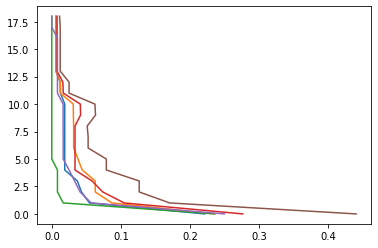

In [47]:
plt.plot(np.array(recall).T, np.arange(0,19))

In [48]:
move_len = np.zeros(19)
for i in video_list:
    move_len = move_len + Dm.loc[i,:][0::2].num_movement_scit1
move_len

0     34.0
2     25.0
4     13.0
6     13.0
8     10.0
10     8.0
12     7.0
14     6.0
16     6.0
18     6.0
20     6.0
22     3.0
24     3.0
26     2.0
28     2.0
30     2.0
32     2.0
34     1.0
36     1.0
Name: num_movement_scit1, dtype: float64

In [49]:
preci = []
for i in range(len(count_l_RA_pred)):
    preci.append(count_l_RA_pred[i] / move_len)

In [50]:
np.array(preci).sum(axis=0) / 6

array([0.7254902 , 0.39333333, 0.53846154, 0.48717949, 0.4       ,
       0.4375    , 0.42857143, 0.5       , 0.5       , 0.55555556,
       0.55555556, 0.5       , 0.5       , 0.41666667, 0.41666667,
       0.41666667, 0.41666667, 0.66666667, 0.66666667])

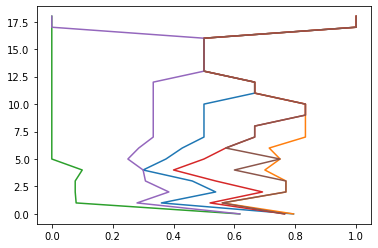

In [51]:
plt.plot(np.array(preci).T, np.arange(0,19))

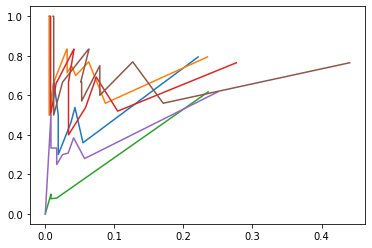

In [52]:
plt.plot(np.array(recall).T, np.array(preci).T)

In [53]:
# AUC calculation:
area = 0
for i in range(len(recall)):
    area = area + np.trapz(np.flip(preci[i]), np.flip(recall[i]))
area / 6

0.15233909098794932

In [54]:
outv = Dv.iloc[0::2]
outv.to_csv('outv.csv')

In [55]:
outm = Dm.iloc[0::2]
outm.to_csv('outm.csv')